Importing python packages (to work with arrays, plotting, etc.), nbodykit (for power spectrum calculation) and modules from BAO Fitter (oscillation feature, bao_model_iso, bao_model_ani)

In [1]:
#importing extra python modules
import numpy as np
import matplotlib.pyplot as plt
#importing nbodykit for template calculation
import nbodykit.lab
import nbodykit
#importing local python modules
import sys
sys.path.append('/home/cristhian/BAOfits/mycode/BAO_Fitter_numba/') #path to code
import bao_template
import bao_model_iso
import bao_model_ani

# Showing some physical quantities that can be obtained with the code

##### Example 1: O(k) factor

Creating BAO templates for EisesteinHu1998 and Hinton2017 methods

In [5]:
# define cosmology and krange for analysis
cosmo = nbodykit.lab.cosmology.Cosmology(Omega0_cdm=0.2588964265232328, Omega0_b=0.048597561544344206, h=0.6774)

#creating two different settings dictionaries
settings_EH = {'cosmo': cosmo, 'load_pk': False, 'z_template': 0.9873, 'smooth_method': 'EH98'}
settings_Hinton = {'cosmo': cosmo, 'load_pk': False, 'z_template': 0.9873, 'smooth_method': 'Hinton17'}
settings_EH_planck = {'cosmo': cosmo, 'load_pk': True, 'z_template': 0., 'smooth_method': 'EH98', 'path_pk': '/home/cristhian/BAOfits/mycode/BAO_Fitter_numba/data/Pk_Planck15_Table4.txt'}
settings_Hinton_planck = {'cosmo': cosmo, 'load_pk': True, 'z_template': 0., 'smooth_method': 'Hinton17', 'path_pk': '/home/cristhian/BAOfits/mycode/BAO_Fitter_numba/data/Pk_Planck15_Table4.txt'}

#EH98
# get linear power spectrum
k_EH, Pk_lin_EH = bao_template.Pk_template(settings_EH)
# get smoothed linear P(k)
Pk_sm_EH = bao_template.get_lin_smooth_model(k_EH, Pk_lin_EH, settings_EH)
# get O(k) interpolator
os_model_EH = bao_template.get_oscillation(k_EH, Pk_lin_EH, Pk_sm_EH, settings_EH)

#Hinton17
k_Hinton, Pk_lin_Hinton = bao_template.Pk_template(settings_Hinton)
Pk_sm_Hinton = bao_template.get_lin_smooth_model(k_Hinton, Pk_lin_Hinton, settings_Hinton)
os_model_Hinton = bao_template.get_oscillation(k_Hinton, Pk_lin_Hinton, Pk_sm_Hinton, settings_Hinton)

#EH98
k_EH, Pk_lin_EH = bao_template.Pk_template(settings_EH_planck)
Pk_sm_EH = bao_template.get_lin_smooth_model(k_EH, Pk_lin_EH, settings_EH_planck)
os_model_EH = bao_template.get_oscillation(k_EH, Pk_lin_EH, Pk_sm_EH, settings_EH_planck)

#Hinton17
#k_Hinton, Pk_lin_Hinton = bao_template.Pk_template(settings_Hinton_planck)
#Pk_sm_Hinton = bao_template.get_lin_smooth_model(k_Hinton, Pk_lin_Hinton, settings_Hinton_planck)
#os_model_Hinton = bao_template.get_oscillation(k_Hinton, Pk_lin_Hinton, Pk_sm_Hinton, settings_Hinton_planck)


Pk_template: no Pk_lin given, calculating it using nbodykit...
get_lin_smooth_model: computing non-wiggle Eisenstein-Hu-1998 P(k)
Pk_template: no Pk_lin given, calculating it using nbodykit...
get_lin_smooth_model: Using smoothed P(k) from Hinton-2017
Pk_template: loading Pk_lin from file...
get_lin_smooth_model: computing non-wiggle Eisenstein-Hu-1998 P(k)


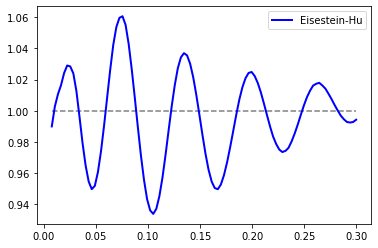

In [7]:

k = np.linspace(0.0075,0.3,100)
plt.plot(k, os_model_EH(k), lw=2, color='blue', label='Eisestein-Hu')

#plt.plot(k, os_model_Hinton(k), lw=2, color='green', label='Hinton')
#Pk_without_BAO = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0., transfer='NoWiggleEisensteinHu')
#Pk_class = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0., transfer='CLASS')
#plt.plot(k, Pk_class(k)/Pk_without_BAO(k), lw=2, color='black', label='XXXXXXXXXXX')
plt.legend()
plt.hlines(1., k[0], k[-1], ls='--', color='gray')

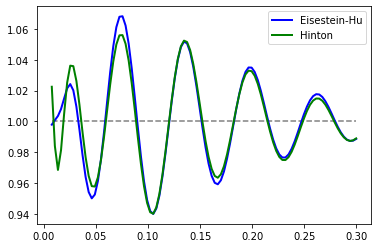

In [5]:

k = np.linspace(0.0075,0.3,100)
plt.plot(k, os_model_EH(k), lw=2, color='blue', label='Eisestein-Hu')
plt.plot(k, os_model_Hinton(k), lw=2, color='green', label='Hinton')
#Pk_without_BAO = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0., transfer='NoWiggleEisensteinHu')
#Pk_class = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0., transfer='CLASS')
#plt.plot(k, Pk_class(k)/Pk_without_BAO(k), lw=2, color='black', label='XXXXXXXXXXX')
plt.legend()
plt.hlines(1., k[0], k[-1], ls='--', color='gray')

In [10]:
h = 0.6774
Ob = 0.02230/h/h
Oc = 0.1188/h/h
Om = Ob +Oc
ns=0.9667
k = np.arange(0.001,0.5,0.001)

def eisenstein_hu(k, h, Om, Ob, ns, s=None, k_eq=None, Tcmb0=2.7255):
    """
    Computes Eisenstein and Hu no-wiggle power spectrum.
    Parameters:
        k (np.ndarray): wavenumbers, in Mpc/h
        h (float): Hubble constant (in km/s/Mpc / (100 km/s))
        Om (float): Omega_matter today
        Ob (float): Omega_baryons today
        ns (float): primordial power spectrum spectral index
        s (float or None): sound horizon at z_drag, in Mpc (if None uses E&H formula)
        k_eq (float or None): k of matter-radiation equality, in Mpc
                              (if None uses E&H formula)
        Tcmb0 (float): CMB temperature today (defaults to 2.7255)
    Returns:
        P (np.ndarray): Eisenstein and Hu power spectrum
        (normalized to 1 at the lowest k asked)
    """
    ## Code based on nbodykit 0.3 implementation of the formulas on the classic E&H 1998 paper
    Obh2      = Ob * h ** 2
    Omh2      = Om * h ** 2
    f_baryon  = Ob / Om
    theta_cmb = Tcmb0 / 2.7

    k = np.sort(k)

    # wavenumber of equality
    if k_eq is None:
        k_eq = 0.0746 * Omh2 * theta_cmb ** (-2) # units of 1/Mpc

    if s is None:
        sound_horizon = h * 44.5 * np.log(9.83/Omh2) / np.sqrt(1 + 10 * Obh2** 0.75) # in Mpc/h
    else:
        sound_horizon = s * h
    alpha_gamma = 1 - 0.328 * np.log(431*Omh2) * f_baryon + 0.38 * np.log(22.3*Omh2) * f_baryon ** 2

    k = k * h
    ks = k * sound_horizon / h
    q = k / (13.41*k_eq)

    gamma_eff = Omh2 * (alpha_gamma + (1 - alpha_gamma) / (1 + (0.43*ks) ** 4))
    q_eff = q * Omh2 / gamma_eff
    L0 = np.log(2*np.e + 1.8 * q_eff)
    C0 = 14.2 + 731.0 / (1 + 62.5 * q_eff)

    T = L0 / (L0 + C0 * q_eff**2)

    k = k/h # k -> h/Mpc
    P = k**ns * T**2
    P = P/P[0]
    return P

def get_broadband_spline(k, pk_bao, pk_no_wiggle):
    """
    Corrects for residual scale dependence of pk_bao - pk_no_wiggle by fitting
    a spline with the smallest smoothing parameter possible without fit BAO
    wiggles. Return broadband correction to be added to pk_no_wiggle.
    Parameters:
        k (np.ndarray): wavenumbers in Mpc/h
        pk_bao (np.ndarray): linear power spectrum, including BAO wiggles
        pk_no_wiggle (np.ndarray): dewiggled power spectrum
    Returns:
        delta_pk_no_wiggle (np.ndarray): correction to be added to pk_no_wiggle
    """
    s_min = np.inf
    relative_wiggles = (1 - pk_no_wiggle / pk_bao)
    s_max = (relative_wiggles**2).sum()
    for s in np.arange(0, s_max, 0.001):
        spl = UnivariateSpline(k, relative_wiggles, s=s)
        arg_peaks_spl = find_peaks(spl(k))[0]
        arg_downs_spl = find_peaks(-spl(k))[0]
        # If the spline oscillates it might be fitting the wiggles, discard
        if len(arg_peaks_spl) + len(arg_downs_spl) > 1:
            continue
        else:
            if s < s_min:
                s_min = s
    relative_wiggles_spl = UnivariateSpline(k, relative_wiggles, s=s_min)
    delta_pk_no_wiggle = relative_wiggles_spl(k) * pk_bao
    return delta_pk_no_wiggle
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

pk_nw = eisenstein_hu(k, h=h,
                              Om=Om,
                              Ob=Ob,
                              ns=ns)

pk_bao = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0., transfer='CLASS')
pk_nw = pk_nw * pk_bao(k)[0] / pk_nw[0]
pk_nw += get_broadband_spline(k, pk_bao(k), pk_nw)

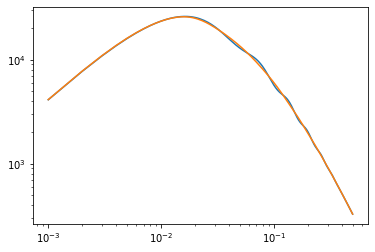

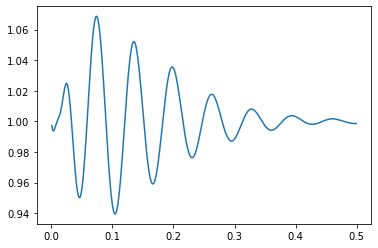

In [12]:
plt.figure()
plt.loglog(k,pk_bao(k))
plt.loglog(k,pk_nw)
plt.show()
plt.figure()
Of = pk_bao(k)/pk_nw
plt.plot(k,Of)

Text(0, 0.5, '$O(k)$')

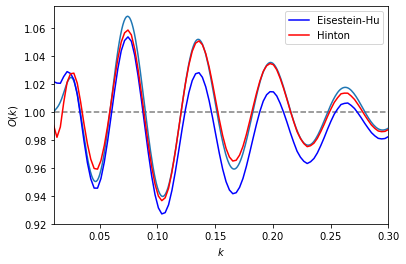

In [32]:
# Calculating O(k)=P_lin(k)/P_sm,lin(k) for a given k array
plt.plot(k,Of)
k = np.linspace(0.01,0.3,100)
Ok_EH = os_model_EH(k)
Ok_Hinton = os_model_Hinton(k)
plt.plot(k, Ok_EH, color='blue', label='Eisestein-Hu')
plt.plot(k, Ok_Hinton, color='red', label='Hinton')
plt.hlines(1,k[0],k[-1],ls='--',color='gray')
plt.legend()
plt.xlim(k[0],k[-1])
plt.xlabel('$k$')
plt.ylabel('$O(k)$')


##### Example 2: BAO power spectrum templates (linear vs non-wiggle)

In [12]:
Pk_lin = np.zeros(len(k))
Pk_nw = np.zeros(len(k))

for i in range(0,len(k)):
    Pk_lin[i] = Pk_class(k[i])
    Pk_nw[i] = Pk_without_BAO(k[i])
plt.plot(k, k*Pk_lin, color='red', label = 'linear P(k)')
plt.plot(k, k*Pk_nw, color='blue', label = 'non-Wiggle P(k)')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$k P(k)$')

NameError: name 'Pk_class' is not defined

##### Example 3: Calculate P(k) based on isotropic analysis model

Calculating P(k) for isotropic analysis

In [5]:
# defining parameters
parameters = {'bias': {'value': 1.0}, 'Sigma_fog': {'value': 0.87}, 'Sigma_NL': {'value': 10.},\
             'alpha': {'value': 1}, 'a_01': {'value': 0.}, 'a_02': {'value': 0.},\
             'a_03': {'value': 0.}, 'a_04': {'value': 0.}, 'a_05': {'value': 0.}}
# defining k-internval
k_interval = np.linspace(0.01,0.30,100)
# defining template
template = { 'noBAO': Pk_without_BAO, 'os_model': os_model }
# defining settings
settings = {'reconstruction': 'pre', 'poly_terms': 5, 'max_poly_power':1}

Text(0, 0.5, '$k P(k)$')

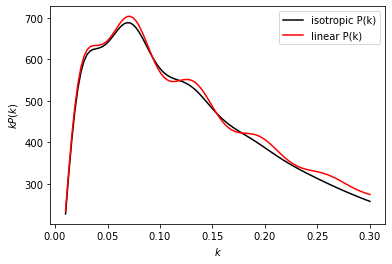

In [6]:
Pk_iso = bao_model_iso.get_shifted_model(parameters, k_interval, template, settings)
plt.plot(k_interval, k_interval*Pk_iso, color='k', label = 'isotropic P(k)')
plt.plot(k, k*Pk_lin, color='red', label = 'linear P(k)')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$k P(k)$')

Text(0, 0.5, '$k P(k)$')

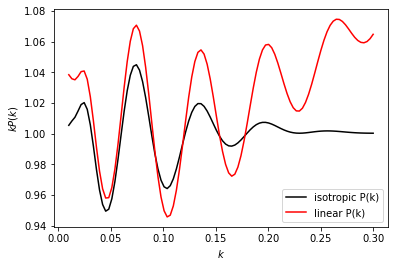

In [7]:
Pk_sm = bao_model_iso.get_smooth_model(parameters, k_interval, template, settings)
Pk_iso = bao_model_iso.get_shifted_model(parameters, k_interval, template, settings)

plt.plot(k_interval, Pk_iso/Pk_sm, color='k', label = 'isotropic P(k)')
plt.plot(k, Pk_lin/Pk_sm, color='red', label = 'linear P(k)')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$k P(k)$')

##### Example 4: Calculate P(k) monopole and quadrupole terms for an anisotropic analysis 

In [8]:
# defining parameters
parameters = {'bias': {'value': 1.4}, 'Sigma_fog': {'value': 1.}, 'beta': {'value': 0.87/1.4},\
             'Sigma_NL_par': {'value': 8.}, 'Sigma_NL_per': {'value': 4.},\
             'alpha_par': {'value': 1.0}, 'alpha_per': {'value': 1.0},\
             'a_01': {'value': 0.}, 'a_02': {'value': 0.}, 'a_03': {'value': 0.},\
             'a_21': {'value': 0.}, 'a_22': {'value': 0.}, 'a_23': {'value': 0.},\
             'a_41': {'value': 0.}, 'a_42': {'value': 0.}, 'a_43': {'value': 0.}}
# defining k-internval
k_interval = np.linspace(0.01,0.30,100)
# defining template
template = { 'noBAO': Pk_without_BAO, 'os_model': os_model }
# defining settings
settings = {'reconstruction': 'post', 'poly_terms': 3, 'multipoles_indices': [0, 2, 4],\
            'Sigma_smooth': 15, 'murange' : np.linspace(0., 1., 100), 'max_poly_power':1}

Text(0, 0.5, '$k P_\\ell(k)$')

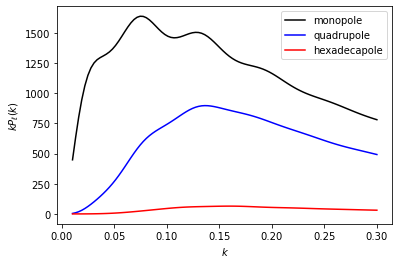

In [9]:
pk0, pk2, pk4 = bao_model_ani.get_multipoles(parameters, k_interval, settings['murange'], template, settings)

plt.plot(k_interval, k_interval*pk0, color='k', label = 'monopole')
plt.plot(k_interval, k_interval*pk2, color='b', label = 'quadrupole')
plt.plot(k_interval, k_interval*pk4, color='r', label = 'hexadecapole')
#plt.plot(k_interval, k_interval*pk0_2, color='r', label = 'monopole2')
#plt.plot(k_interval, k_interval*pk2_2, color='g', label = 'quadrupole2')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$k P_\ell(k)$')

# Best fit

In [5]:
k_north = np.array([0.016060,0.025679,0.035486,0.045362,0.055315,0.065279,0.075231,0.085194,0.095167,0.105161,0.115154,0.125137,0.135124,0.145117,0.155115,0.165108,0.175100,0.185094,0.195084,0.205078,0.215082,0.225080,0.235072,0.245069,0.255067,0.265068,0.275064,0.285056,0.295053])

k_south = np.array([0.016104,0.025683,0.035451,0.045331,0.055295,0.065256,0.075208,0.085132,0.095147,0.105162,0.115139,0.125117,0.135108,0.145098,0.155091,0.165095,0.175098,0.185082,0.195099,0.205086,0.215057,0.225058,0.235076,0.245067,0.255069,0.265065,0.275061,0.285057,0.295059])

pk_north = np.array([64563.675781,52256.812500,45098.042969,35221.652344,30668.996094,27145.765625,23354.783203,19826.093750,16766.845703,14201.283203,12680.097656,11943.140625,10459.865234,9201.574219,8387.318359,7497.844238,6922.296387,6526.580566,6013.686035,5480.104980,5075.222168,4709.198730,4406.342285,4156.064941,3894.307129,3543.967285,3272.125488,3125.982910,2924.136230])

pk_south = np.array([65120.664062,61193.671875,43281.562500,35016.261719,30460.425781,27558.457031,22975.957031,18502.718750,16266.265625,14486.396484,12704.218750,11558.970703,10498.035156,9571.474609,8532.203125,7305.504883,6818.794922,6188.223633,5913.471680,5443.715820,5145.077148,4710.087891,4381.950195,4077.736328,3953.803711,3665.202148,3526.357422,3154.699219,2954.457031])

cov_north = np.loadtxt("/home/cristhian/BAOfits/mycode/BAO_Fitter/data/boss_dr12_z_0p5_0p75/cov_boss_dr12_north.dat", dtype='f', delimiter='\t')

cov_south = np.loadtxt("/home/cristhian/BAOfits/mycode/BAO_Fitter/data/boss_dr12_z_0p5_0p75/cov_boss_dr12_south.dat", dtype='f', delimiter='\t')

var_north = cov_north.diagonal()

var_south = cov_south.diagonal()

In [4]:
cosmo = nbodykit.lab.cosmology.Cosmology(Omega0_cdm=0.2588964265232328, Omega0_b=0.048597561544344206, h=0.6774)
Pk_without_BAO = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0.61, transfer='NoWiggleEisensteinHu')
Pk_class = nbodykit.lab.cosmology.power.linear.LinearPower(cosmo, redshift=0.61, transfer='CLASS')
krange = np.arange(0.001, 0.5, 0.001) # k array large enough for interpolation
# get O(k) interpolator
os_model = oscillatory_feature.get_oscillation(krange, Pk_class, Pk_without_BAO)

# defining parameters
parameters = {'bias': {'value': 2.5233}, 'Sigma_fog': {'value': 0.0}, 'Sigma_NL': {'value': 8.6487},\
             'alpha': {'value': 0.9952}, 'a_01': {'value': -8920.0914}, 'a_02': {'value': 6002.2917},\
             'a_03': {'value': -1123.3177}, 'a_04': {'value': 14.5897}, 'a_05': {'value': -0.0617}}
# defining k-internval
k_interval = np.linspace(0.01,0.30,100)
# defining template
template = { 'noBAO': Pk_without_BAO, 'os_model': os_model }
# defining settings
settings = {'reconstruction': 'pre', 'poly_terms': 5, 'max_poly_power': 1}

Text(0, 0.5, '$k P(k)$')

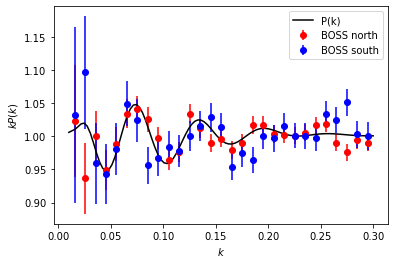

In [6]:
# isotropic model for P(k)
Pk_iso = bao_model_iso.get_shifted_model(parameters, k_interval, template, settings)
# north hemisphere data
data_north = pk_north/bao_model_iso.get_smooth_model(parameters,k_north,template,settings)
error_north = np.sqrt(var_north)/bao_model_iso.get_smooth_model(parameters,k_north,template,settings)
# south hemisphere data
data_south = pk_south/bao_model_iso.get_smooth_model(parameters,k_south,template,settings)
error_south = np.sqrt(var_south)/bao_model_iso.get_smooth_model(parameters,k_south,template,settings)

plt.plot(k_interval, Pk_iso/bao_model_iso.get_smooth_model(parameters,k_interval,template,settings), color='k', label = 'P(k)')
plt.errorbar(k_north, data_north, error_north, color='red', marker="o", linestyle="none", label = 'BOSS north')
plt.errorbar(k_south, data_south, error_south, color='blue', marker="o", linestyle="none", label = 'BOSS south')

plt.legend()
plt.xlabel('$k$')
plt.ylabel('$k P(k)$')